In [1]:
import numpy as np
import pandas as pd

In [2]:
OrangeDF = pd.read_csv("../OrangeQualityData.csv")

In [17]:
OrangeDF.head(5)

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5


In [18]:
OrangeDF.dtypes

Size (cm)             float64
Weight (g)              int64
Brix (Sweetness)      float64
pH (Acidity)          float64
Softness (1-5)        float64
HarvestTime (days)      int64
Ripeness (1-5)        float64
Color                  object
Variety                object
Blemishes (Y/N)        object
Quality (1-5)         float64
dtype: object

In [25]:
print(OrangeDF["Color"].apply(type).unique())
print(OrangeDF["Variety"].apply(type).unique())
print(OrangeDF["Blemishes (Y/N)"].apply(type).unique())
print(OrangeDF.isna().sum())

[<class 'str'>]
[<class 'str'>]
[<class 'str'>]
Size (cm)             0
Weight (g)            0
Brix (Sweetness)      0
pH (Acidity)          0
Softness (1-5)        0
HarvestTime (days)    0
Ripeness (1-5)        0
Color                 0
Variety               0
Blemishes (Y/N)       0
Quality (1-5)         0
dtype: int64


^No columns with mixed values and no missing values in dataset

In [54]:
print(OrangeDF["Variety"].value_counts(normalize=True))
print(OrangeDF["Variety"].value_counts(normalize=True).head(10).sum())

Variety
Cara Cara                0.087137
Temple                   0.074689
Star Ruby                0.074689
Navel                    0.066390
Moro (Blood)             0.066390
Tangerine                0.058091
Clementine               0.058091
Washington Navel         0.058091
Satsuma Mandarin         0.053942
Ortanique (Hybrid)       0.053942
Minneola (Hybrid)        0.049793
Jaffa                    0.045643
Ambiance                 0.045643
Valencia                 0.045643
California Valencia      0.029046
Honey Tangerine          0.029046
Hamlin                   0.020747
Midsweet (Hybrid)        0.020747
Clementine (Seedless)    0.016598
Murcott (Hybrid)         0.012448
Navel (Late Season)      0.012448
Blood Orange             0.008299
Navel (Early Season)     0.008299
Tangelo (Hybrid)         0.004149
Name: proportion, dtype: float64
0.6514522821576764


^top 10 orange types make up 65% of the data, with the other 14 making up the other 35%

In [57]:
OrangeDF["Blemishes (Y/N)"].value_counts(normalize=True)

Blemishes (Y/N)
N                          0.618257
Y (Sunburn Patch)          0.095436
Y (Scars)                  0.070539
Y (Minor)                  0.058091
Y (Mold Spot)              0.041494
Y (Bruising)               0.037344
Y (Split Skin)             0.033195
Y (Minor Insect Damage)    0.024896
Y (Sunburn)                0.008299
Y (Bruise)                 0.004149
N (Minor)                  0.004149
N (Split Skin)             0.004149
Name: proportion, dtype: float64


## **^^WE NEED TO DECIDE HOW TO REPRESENT ABOVE: EITHER 1s & 0s, SCALE FROM 0-1, OR DUMMY ENCODING FOR EACH TYPE OF BLEMISH (PROBABLY NOT SINCE WE DONT WANT TOO HIGH DIMENSIONS)**

In [51]:
OrangeDF.describe()

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5)
count,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000,241.000000
mean,7.844813,205.128631,10.907884,3.473900,3.072614,15.344398,3.599585,3.817427
std,1.086002,56.461012,2.760446,0.421007,1.323630,5.323852,1.205214,1.014410
min,6.000000,100.000000,5.500000,2.800000,1.000000,4.000000,1.000000,1.000000
25%,6.900000,155.000000,8.500000,3.200000,2.000000,11.000000,3.000000,3.000000
50%,7.800000,205.000000,11.000000,3.400000,3.000000,15.000000,4.000000,4.000000
75%,8.700000,252.000000,13.400000,3.800000,4.000000,20.000000,4.500000,4.500000
max,10.000000,300.000000,16.000000,4.400000,5.000000,25.000000,5.000000,5.000000


No extreme outliers and fairly normally distributed data for most columns as shown below

array([[<Axes: title={'center': 'Size (cm)'}>,
        <Axes: title={'center': 'Weight (g)'}>,
        <Axes: title={'center': 'Brix (Sweetness)'}>],
       [<Axes: title={'center': 'pH (Acidity)'}>,
        <Axes: title={'center': 'Softness (1-5)'}>,
        <Axes: title={'center': 'HarvestTime (days)'}>],
       [<Axes: title={'center': 'Ripeness (1-5)'}>,
        <Axes: title={'center': 'Quality (1-5)'}>, <Axes: >]],
      dtype=object)

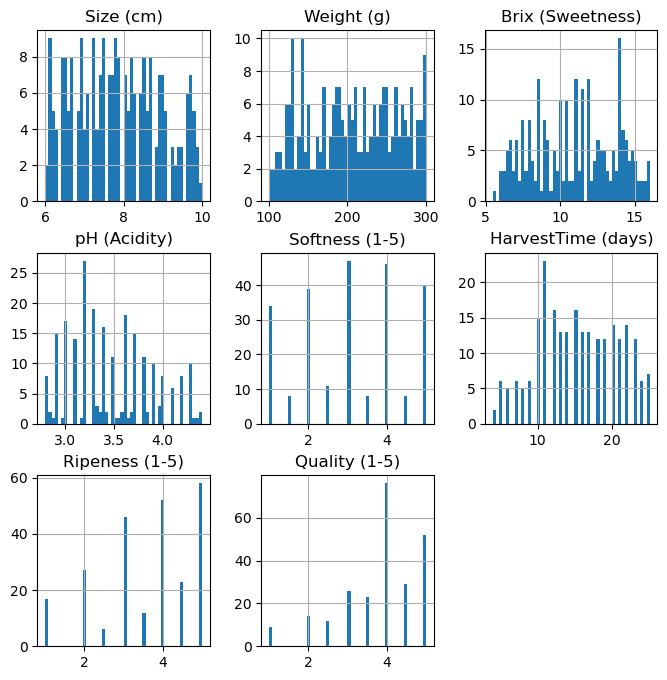

In [49]:
OrangeDF.hist(figsize=(8,8), bins=50)